___
# Simple Metal-Cash Safety-Net PF Simulation
___

11 jan 21

#### 1 Liner

Simulations of metal / cash portfolio strategies and assessing performance as safety nets with respect to purchasing power relative to the time of initialisation of the portfolio. 

### Table of Contents

- [Initial cleanup](#cleanupp)
- [Data Selection](#select)
- [Simulations](#s0)
    - [Scenario 0:](#s0)
        - [Strategy 1](#s0s1)
        - [Strategy 2](#s0s2)
        - [Strategy 3](#s0s3)
    - [Scenario 1:](#s1)
    - [Scenario 2:](#s2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt

cwd = os.getcwd()

___
### Initial Clean Up <a class="anchor" id="cleanup"><a/>
___

In [2]:
# --- Raw CSVs

m2_raw = pd.read_csv(os.path.join(cwd, "data/us_m2.csv"))
gold_raw = pd.read_csv(os.path.join(cwd, "data/usd_gold.csv"))
djia_raw = pd.read_csv(os.path.join(cwd, "data/djia.csv"))
infl_raw = pd.read_csv(os.path.join(cwd, "data/usa_infl.csv"))

print("M2 : ", m2_raw.head(1).DATE, "\ngold : ", gold_raw.head(1).DATE, "\ndjia : ", djia_raw.head(1).Date)
print("inflation: ", infl_raw.head(1).DATE)

M2 :  0    1980-11-03
Name: DATE, dtype: object 
gold :  0    1968-04-01
Name: DATE, dtype: object 
djia :  0    Jan 03, 2021
Name: Date, dtype: object
inflation:  0    1960-01-01
Name: DATE, dtype: object


In [3]:
# --- Check min max dates 

m2_dates = m2_raw.DATE.values
gold_dates = gold_raw.DATE.values
# djia_dates = djia_raw.Date.values
infl_dates = infl_raw.DATE.values
print("M2  date bounds: ", m2_dates.min(), m2_dates.max())
print("Au  date bounds: ", gold_dates.min(), gold_dates.max())
# print("dj  date bounds: ", djia_dates.min(), djia_dates.max())
print("inf date bounds: ", infl_dates.min(), infl_dates.max())

M2  date bounds:  1980-11-03 2020-12-28
Au  date bounds:  1968-04-01 2021-01-08
inf date bounds:  1960-01-01 2019-01-01


datetime64[ns] float64


<ipython-input-4-dfd8c645b8cc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold[y_g] = gold[y_g].astype(float)
<ipython-input-4-dfd8c645b8cc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold[x] = pd.to_datetime(gold[x], format="%Y-%m-%d")


<AxesSubplot:xlabel='DATE'>

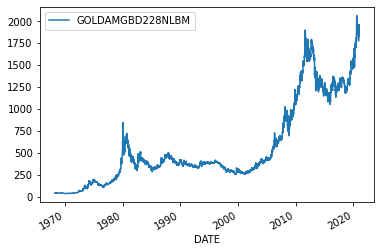

In [4]:
# --- Gold Clean

x = "DATE"
y_g = "GOLDAMGBD228NLBM"

gold = gold_raw[gold_raw[y_g] != '.']
gold[y_g] = gold[y_g].astype(float)
gold[x] = pd.to_datetime(gold[x], format="%Y-%m-%d")
print(gold[x].dtype, gold[y_g].dtype)
gold.plot(x=x, y=y_g)

datetime64[ns] float64


DATE              1981-01-01 00:00:00
FPCPITOTLZGUSA                10.3347
Name: 21, dtype: object

<AxesSubplot:xlabel='DATE'>

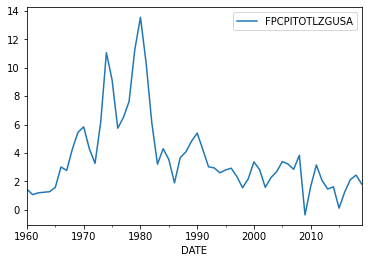

In [5]:
# --- Inflation Clean

y_i = "FPCPITOTLZGUSA"

infl = infl_raw
infl[x] = pd.to_datetime(infl[x], format="%Y-%m-%d")
print(infl[x].dtype, infl[y_i].dtype)
infl[y_i].apply(lambda v: v * .001)

display(infl.iloc[21])
infl.plot(x=x, y=y_i)

<AxesSubplot:xlabel='DATE'>

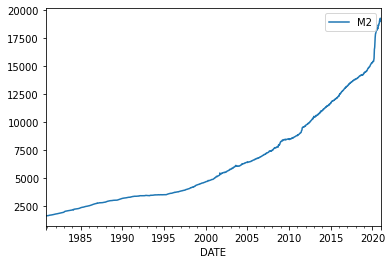

In [6]:
# --- M2 Clean

y = "M2"
m2 = m2_raw
m2[x] = pd.to_datetime(m2[x], format="%Y-%m-%d")

m2.plot(x=x, y=y)

___
### Select (and prep) Relevant Data <a class="anchor" id="select"> </a>
___

,index,DATE,FPCPITOTLZGUSA
0,21,1981-01-01,10.334715
1,22,1982-01-01,6.131427
2,23,1983-01-01,3.212435
3,24,1984-01-01,4.300535
4,25,1985-01-01,3.545644


,monthly_inflation
date,
1981-01-01,0.008612
1981-02-01,0.008612
1981-03-01,0.008612
1981-04-01,0.008612
1981-05-01,0.008612


,monthly_inflation
date,
2019-08-01,0.00151
2019-09-01,0.00151
2019-10-01,0.00151
2019-11-01,0.00151
2019-12-01,0.00151


<AxesSubplot:xlabel='date'>

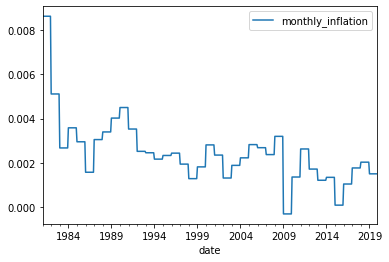

In [7]:
# --- Inflation Select

infl_cleanup = infl[(infl.DATE > dt.datetime.strptime("1980-1-1","%Y-%m-%d")) &
                   (infl.DATE < dt.datetime.strptime("2020-1-1","%Y-%m-%d"))].reset_index()
infl_1 = pd.DataFrame(columns=["date", "monthly_inflation"])
display(infl_cleanup.head())
for i, v in infl_cleanup.iterrows():
    date_unique = v.DATE.year
    monthly_inflation = v.FPCPITOTLZGUSA / (12/.01) # monthly inflation as a decimal
    for i in range(1, 13):
        infl_1 = infl_1.append({
                "date" : dt.datetime.strptime((str(date_unique) + "-{:02}-01".format(i)), "%Y-%m-%d"), 
                "monthly_inflation" : monthly_inflation
            }, ignore_index=True)

infl_1 = infl_1.set_index('date')
display(infl_1.head(), infl_1.tail())

infl_1.plot()

,m2
date,
1981-01-01,1596.6
1981-02-01,1608.6
1981-03-01,1626.1
1981-04-01,1652.3
1981-05-01,1663.9


,m2
date,
2019-08-01,14920.7
2019-09-01,14972.7
2019-10-01,15110.5
2019-11-01,15212.9
2019-12-01,15281.1


<AxesSubplot:xlabel='date'>

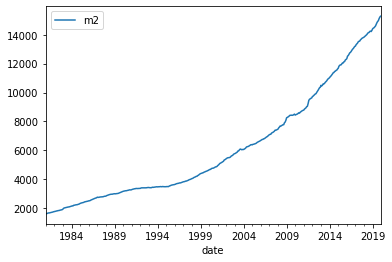

In [8]:
# --- M2 Select 

m2_cleanup = m2[(m2.DATE > dt.datetime.strptime("1981-1-1","%Y-%m-%d")) &
               (m2.DATE < dt.datetime.strptime("2020-1-1","%Y-%m-%d"))].reset_index()
m2_1 = pd.DataFrame(columns = ["date", "m2"])
for i, v in m2_cleanup.iterrows():
    added_dates = m2_1.date.values.astype(str)
    date_unique = v.DATE.strftime("%Y-%m-%d")[:-3]
    if date_unique not in added_dates:
        m2_1 = m2_1.append({
            "date" : date_unique,
            "m2" : v.M2
        }, ignore_index=True)

for i in m2_1.index:
    m2_1.loc[i, "date"] = dt.datetime.strptime( m2_1.loc[i, "date"]+ "-01", "%Y-%m-%d")
m2_1 = m2_1.set_index('date')
display(m2_1.head(), m2_1.tail())

m2_1.plot()

,gold
date,
1981-01-01,592.00
1981-02-01,493.25
1981-03-01,474.50
1981-04-01,516.75
1981-05-01,484.75


,gold
date,
2019-08-01,1406.40
2019-09-01,1523.35
2019-10-01,1466.10
2019-11-01,1509.85
2019-12-01,1457.50


<AxesSubplot:xlabel='date'>

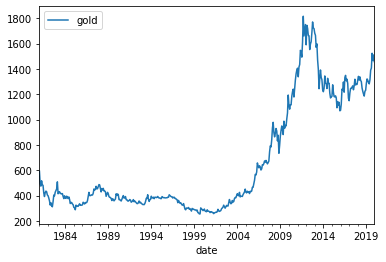

In [9]:
# --- Gold select 

gold_cleanup = gold[(gold.DATE > dt.datetime.strptime("1981-1-1","%Y-%m-%d")) & 
                    (gold.DATE < dt.datetime.strptime("2020-1-1","%Y-%m-%d"))]
au_1 = pd.DataFrame(columns = ["date", "gold"])
for i, v in gold_cleanup.iterrows():
    added_dates = au_1.date.values.astype(str)
    date_unique = v.DATE.strftime("%Y-%m-%d")[:-3]

    if date_unique not in added_dates:
        au_1 = au_1.append({
            "date" : date_unique,
            "gold" : v.GOLDAMGBD228NLBM
        }, ignore_index=True)

for i in au_1.index:
    au_1.loc[i, "date"] = dt.datetime.strptime(au_1.loc[i, "date"]+ "-01", "%Y-%m-%d")
au_1 = au_1.set_index('date')
display(au_1.head())
display(au_1.tail())
au_1.plot()

In [10]:
# --- Sanity Check

all(au_1.index == m2_1.index) == all(au_1.index == infl_1.index)

True

In [11]:
# --- Stitch data into one df

index = au_1.index
# cols = ["monthly_inflation", "m2", "gold"]
glm = pd.DataFrame()
for i in index:
    append_me = {
        "date" : i,
        "monthly_inflation" : infl_1.loc[i].monthly_inflation,
        "m2" : m2_1.loc[i].m2,
        "gold" : au_1.loc[i].gold
                }
    glm = glm.append(append_me, ignore_index=True)
glm = glm.set_index('date')
glm.head()

,gold,m2,monthly_inflation
date,,,
1981-01-01,592.00,1596.6,0.008612
1981-02-01,493.25,1608.6,0.008612
1981-03-01,474.50,1626.1,0.008612
1981-04-01,516.75,1652.3,0.008612
1981-05-01,484.75,1663.9,0.008612


<AxesSubplot:label='7286a842-616e-4454-b5f5-a37b4f540b78'>

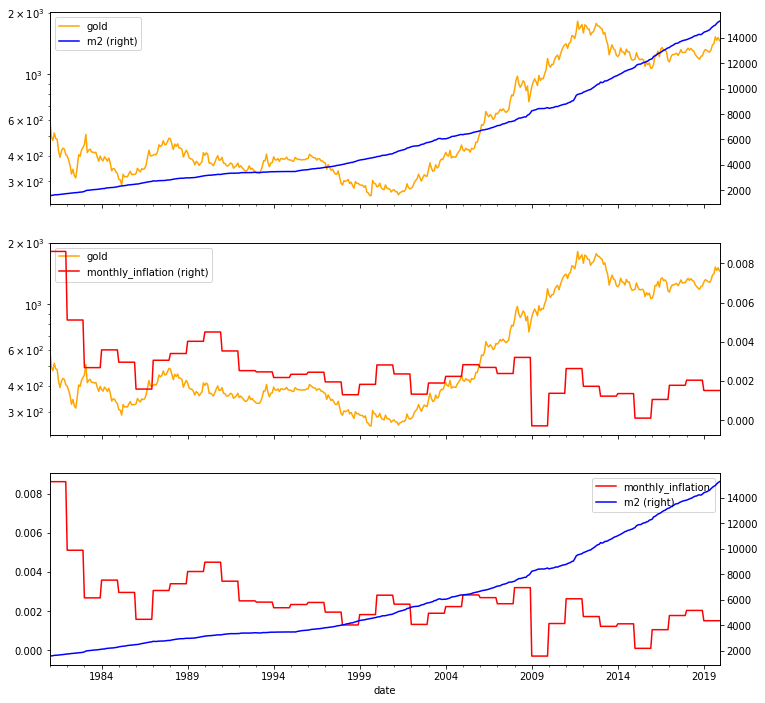

In [12]:
# --- A quick look

fig, ax = plt.subplots(nrows=3, figsize=(12, 12))
glm.plot(y='gold', ax=ax[0], logy=True, color="orange")
glm.plot(y='m2', ax=ax[0], secondary_y=True, color="blue")
glm.plot(y='gold', ax=ax[1], logy=True, color="orange")
glm.plot(y='monthly_inflation', ax=ax[1], secondary_y=True, color="red")
glm.plot(y='monthly_inflation', ax=ax[2], color="red")
glm.plot(y='m2', ax=ax[2], secondary_y=True, color="blue")

___
## Scenario 1: Historical Performance <a class="anchor" id="s0"> </a>
___

#### 1 Liner
Create a set of financial safety-net portfolios of cash (USD) and gold, reflecting certain strategies and implement them all at every month of the dataset. Assess their perforamnce with regards to purchasing power (PP) of a dollar in some number of years or just max it out at 2019-12-01.

#### > 1 liner
Since this is supposed to be a simulation to test portfolios intended to act as a financial safety net, I want the metrics to capture a proxy for "sense of security", like, feeling comfortable withdrawing from the net in times of need. There's two scenarios in which I might choose to withdraw from this portfolio: 

1. Emergencies - one offs, probably large cost. As a matter of liquidity, probably the kind of events you would buy insurance for.
2. Trickle - small but ongoing cost. Losing a job or taking out a loan for something and having to pay back larger chunks of cash than the consumption allocated cashflow might allow for sort of scenarios.

So naturally, the value of the portfolio is important but so is variance, broadly speaking, as variance suggests something about it's reliability over the lifetime of the portfolio. Variability of circumstances is going to be simulated with past price action and inflation rates.

The final thing to consider here is the behaviour of the agent. Of course, strategy, but the point of this whole exercise is to be able to withdraw from the fund when necessary. So we're also going to throw in random events of the nature listed above. They'll be represented by withdrawals.

Why cash and gold?

Stock and bond performance is positively correlated in the long run, stockbond and gold performance is negatively correlated in the long run. I leave this as an exercise to all zero of my readers to convince themselves of. Cash is liquid and stockbonds are less so. Hence the choice of cash and gold.

#### Scenario Assumptions

- $\forall$ simulations, time works in months $t \in [0, T] \subset \mathbb{Z}$ 
- Price of money is relative to the beginning of the strategy implementation
    - $\forall$ simulations, at $t = 0, pp_0 = 1$
    - $pp_t$ for $t > 0$ is determined via inflation
- Forget tax and other friction of that sort for now

- Withdrawals will be initiated at some point in the strategy random-$\mathcal{U}$niformly, and their features will be random-$\mathcal{N}$ormal.

For emergency events, the magnitude required will be $|M_e| \sim \mathcal{N}(\cdot, \cdot)$

For trickle events, the magnitude will be $|M_t| \sim \mathcal{N}(\cdot,\cdot)$ and the duration will be $|D_t| \sim \mathcal{N}(\cdot, \cdot)$

#### Metrics

- Profitability will generally be referred to with a $\pi$.
    - Profitability at time $t$ is $\pi_t = \pi_t - \pi_0$
    - Point profitability at time $t$ will be $\Delta\pi_t = \pi_t - \pi_{t-1}$
- Absolute profit, which will be $\pi_T - \pi_0$
- Variance, let's say, on point profitability $\Delta \pi_t \>\forall t$
- Importantly, purchasing power (pp) and point purchasing power*
- A second pp adjusted $\pi$ and $var$ but using M2 as the measure of inflation instead of CPI**.
- For simulations with withdrawals, the above two metrics can be compared to the baseline (no withdrawals)

##### Notes on metrics:
\* I want to measure *preserved* pp, so I'm going to measure pp the typical way where the base year is the year in which the strategy is initialised.

For inflated absolute profit, don't apply the percentages incorrectly. Use that maths brain.

For inflated point profit, you need to take the nominal profit from base year then adjust, THEN take the deltas in order to get inflated point profits.

\*\* Since this is as much pragmatic as it is me showing off my python101 skills, I will also use proportion of m2 as another kind of inflationary measure, as opposed to CPI (the inflation dataset used in this Notebook). Reason in short being a combination of 1. the definition of CPI changes over time, and sometimes dramatically so (e.g. RBA made definitional changes to how housing impacts CPI back in the 90s) 2. I don't think the cpi measure are, intentional or not, honest. (e.g. RBA's incorporation of childcare price (100% of) changes during 2020 quarantine). The assumption that CPI measure inflation is broken is already subtly present in the fact that I drew M2 on gold prices.

For the sake of simplicity, let's just use percentage increase in supply as the rate of inflation.

#### Agent Behavioural Assumptions
**Strategy 1**

1. Allocate (gold, cash) with proportion $(r, 1-r)$ for $r \in [0, 1] \subset \mathbb{R}$.
    - We can just sweep say .1 jumps to start
2. Liquidate entirely at the end of some time period
    - Let's just do $12t \in [1, 10] \subset \mathbb{Z}$ (12 since $t$ is in months)

Output: I want to see
- Absoulte $\pi$ 
- Variance on $\Delta \pi_t$
- Absolute pp
- Variance on pp
    
plotted against r from 0 to 1.

**Strategy 2**

1. Allocate (gold, cash) with proportion $(r, 1-r)$.
    - Same param sweep as the first strat
2. Rebalance to the original proportion at regular intervals
    - Param sweep say, $12t,  t\in [1, 4] \subset \mathbb{Z}$

**Strategy 3**

1. Allocate (gold, cash) with proportion $(r, 1-r)$.
    - Same param sweep as the first strat
2. Rebalance to the original proportion at some deviation from the proportion
    - Param sweep a bunch of $\delta s \in (0, 0.5) \subset \mathbb{R}$ since naturally

#### Simulations:

- Strategy: 1 / 2 / 3 
- Withdrawals: yes / no 

So, that's 6 simulations:

0. Strat 1, No withdrawal
1. Strat 1, Yes withdrawal
2. Strat 2, No withdrawal
3. Strat 2, No withdrawal
4. Strat 3, Yes withdrawal
5. Strat 3, No withdrawal

___
## Sim 0 Strategy 1 No Withdrawals <a class="anchor" id="s0s1"></a>
___

In [13]:
# --- Tweak df

df = glm.copy()
for col in ['gold', 'm2']:
    df["d{}".format(col)] = df[col].diff(1)
df['m2_inflation'] = df.dm2 / df.m2
df = df.fillna(0)
df.head()

,gold,m2,monthly_inflation,dgold,dm2,m2_inflation
date,,,,,,
1981-01-01,592.00,1596.6,0.008612,0.00,0.0,0.000000
1981-02-01,493.25,1608.6,0.008612,-98.75,12.0,0.007460
1981-03-01,474.50,1626.1,0.008612,-18.75,17.5,0.010762
1981-04-01,516.75,1652.3,0.008612,42.25,26.2,0.015857
1981-05-01,484.75,1663.9,0.008612,-32.00,11.6,0.006972


In [14]:
# --- Strategy 1 for 1 year

r = np.arange(0, 1.1, 0.1)
cols = ['abs_pi', 'var_pi', 'abs_pp_i', 'abs_pp_m', 'var_pp_i', 'var_pp_m']
listed_ind = list(df.index)
# Make double index (date : ratio)
super_index = np.concatenate(([np.array([i]* 11) for i in listed_ind]))
strat_index = np.array(list(r) * len(df))
index = [super_index, strat_index]

result_template = pd.DataFrame(index=index, columns=cols)
display(result_template.head(13))

abs_pi var_pi abs_pp_i abs_pp_m var_pp_i var_pp_m
1981-01-01 0.0    NaN    NaN      NaN      NaN      NaN      NaN
           0.1    NaN    NaN      NaN      NaN      NaN      NaN
           0.2    NaN    NaN      NaN      NaN      NaN      NaN
           0.3    NaN    NaN      NaN      NaN      NaN      NaN
           0.4    NaN    NaN      NaN      NaN      NaN      NaN
           0.5    NaN    NaN      NaN      NaN      NaN      NaN
           0.6    NaN    NaN      NaN      NaN      NaN      NaN
           0.7    NaN    NaN      NaN      NaN      NaN      NaN
           0.8    NaN    NaN      NaN      NaN      NaN      NaN
           0.9    NaN    NaN      NaN      NaN      NaN      NaN
           1.0    NaN    NaN      NaN      NaN      NaN      NaN
1981-02-01 0.0    NaN    NaN      NaN      NaN      NaN      NaN
           0.1    NaN    NaN      NaN      NaN      NaN      NaN

The way this df is organised is that each (super, sub-index) contains the data for a portfolio initiated at it's (date, ratio).

e.g. (1981-01-01, 0.2) contains the data for the strategy initiated on 1 Jan 1981 with a gold : cash ratio of 0.2 : 0.8

In [15]:
# --- Dollar value of initialised pf and result dictionary

result01 = []
result_list = []
strat_lens = range(1, 11)
dollars = 1000

In [104]:
### --- Simple Sim 0 

for i in strat_lens:
    output = result_template.copy()
    
    # length of strategy in years
    years = i
    
    # Pull out date and ratio ranges to access indexes and  df most conveniently
    dates = np.unique(np.array([i[0] for i in output.index]))
    ratios = np.unique(np.array([i[1] for i in output.index]))

    # Because of Febuaries, I cant use a timedelta for date arithmetic
    terminate_date = dt.datetime.strftime(dates.max(), "%Y-%m-%d").split('-')
    terminate_date = str(int(terminate_date[0]) - i) + "-" + terminate_date[1] + "-" + terminate_date[2]
    terminate_date = dt.datetime.strptime(terminate_date, "%Y-%m-%d")
#     print(terminate_date)
    for d in dates:
        if d < terminate_date:
            for r in ratios:
                
        # --- Calculate absolute profit
        
                pf_start_gold = df.gold[d]
                str_date = dt.datetime.strftime(d, "%Y-%m-%d").split('-')
                str_pidate = str(int(str_date[0]) + i) + "-" + str_date[1] + "-" + str_date[2]
                end_date = dt.datetime.strptime(str_pidate, "%Y-%m-%d")
                pf_end_gold = df.gold[end_date]
                pf_val_start = dollars
                pf_val_end = (r * dollars * pf_start_gold) / (pf_end_gold) + (1-r) * dollars
                abs_pi = pf_val_end - pf_val_start
                output.abs_pi[d, r] = abs_pi
                
        # --- Calculate Profit Variance
        
                d_index_in_dates = np.where(dates == d)[0][0]
                var_targets = dates[d_index_in_dates : d_index_in_dates + 12 * years]
                gold_prices = np.array([df.loc[d].gold for d in var_targets])
                pf_val_monthly = np.array([(r * dollars * gold_prices[0]) / price + (1-r) * dollars for price in gold_prices])
                pf_pi_monthly = pf_val_monthly - dollars
                pf_deltas = np.concatenate([[0], pf_pi_monthly[1:] - pf_pi_monthly[:-1]])
                var_pi = np.var(pf_deltas)
                output.var_pi[d, r] = var_pi

        # --- Calculate Absolute purchasing power
        
                infl_dates = dates[d_index_in_dates : d_index_in_dates + 12 * years]
                date_infls = np.array([df.loc[date].monthly_inflation for date in infl_dates])
                apply_infls = 1 - date_infls
                abs_infl_rate = np.prod(apply_infls)
                abs_pp_i = pf_val_end * abs_infl_rate - dollars
                output.abs_pp_i[d, r] = abs_pp_i

        # --- Calculate Variance on purchasing power

                monthly_abs_val_inflated = np.array([j * np.prod(apply_infls[: i + 1]) for i, j in enumerate(pf_val_monthly)])
                pf_start = np.full_like(monthly_abs_val_inflated, dollars)
                pf_start_val_inflated = np.array([j * np.prod(apply_infls[: i + 1]) for i, j in enumerate(pf_start)])
                if r == 0: monthly_pp_deltas = monthly_abs_val_inflated - dollars
                else: monthly_pp_deltas = monthly_abs_val_inflated - pf_start_val_inflated
                var_pp_i = np.var(monthly_pp_deltas)
                output.var_pp_i[d, r] = var_pp_i
                    
        # --- Calculate Absolute Purchasing Power using M2 as the measure of inflation
        
                date_infl_m2 = np.array([df.loc[date].m2_inflation for date in infl_dates])
                apply_infl_m2 = 1 - date_infl_m2
                abs_infl_m2 = np.prod(apply_infl_m2)
                abs_pp_m = pf_val_end * abs_infl_m2 - dollars
                output.abs_pp_m[d, r] = abs_pp_m
                    
        # --- Calculate variance on m2 inflation adjusted purchasing power
                
                monthly_abs_val_inflated_m2 = np.array([j * np.prod(apply_infl_m2[: i + 1]) for i, j in enumerate(pf_val_monthly)])
                pf_start_m2 = np.full_like(monthly_abs_val_inflated_m2, dollars)
                pf_start_val_inflated_m2 = np.array([j * np.prod(apply_infl_m2[: i + 1]) for i, j in enumerate(pf_start_m2)])
                if r == 0: monthly_pp_deltas_m2 = monthly_abs_val_inflated_m2 - dollars
                else: monthly_pp_deltas_m2 = monthly_abs_val_inflated_m2 - pf_start_val_inflated_m2
                var_pp_m = np.var(monthly_pp_deltas_m2)
                output.var_pp_m[d, r] = var_pp_m

    print("Year: {y}, Ratio: {r}".format(y=i, r=r))
    display(output.head(14))
    result_list.append(output)

Year: 1, Ratio: 1.0


abs_pi   var_pi abs_pp_i abs_pp_m var_pp_i var_pp_m
1981-01-01 0.0        0        0 -98.5897 -87.2399  797.288  665.988
           0.1  48.3709  85.9778 -54.9877 -43.0888  162.957  168.279
           0.2  96.7419  343.911 -11.3856  1.06223  651.829  673.114
           0.3  145.113    773.8  32.2164  45.2133  1466.62  1514.51
           0.4  193.484  1375.64  75.8185  89.3643  2607.32  2692.46
           0.5  241.855  2149.44  119.421  133.515  4073.93  4206.97
           0.6  290.226   3095.2  163.023  177.666  5866.46  6058.03
           0.7  338.596  4212.91  206.625  221.817  7984.91  8245.65
           0.8  386.967  5502.58  250.227  265.969  10429.3  10769.8
           0.9  435.338   6964.2  293.829   310.12  13199.5  13630.6
           1.0  483.709  8597.78  337.431  354.271  16295.7  16827.9
1981-02-01 0.0        0        0 -95.4049 -91.0333  774.526  618.793
           0.1   29.377  43.1818 -68.8305 -64.3305  81.8104   82.478
           0.2  58.7541  172.727 -42.2562 -37.6278  327.241  329.912

Year: 2, Ratio: 1.0


abs_pi   var_pi abs_pp_i  abs_pp_m var_pp_i var_pp_m
1981-01-01 0.0        0        0 -152.332  -155.997  1876.34  2111.31
           0.1  30.7565  122.724 -126.261  -130.039  373.862  377.605
           0.2   61.513  490.896 -100.189   -104.08  1495.45  1510.42
           0.3  92.2695  1104.52 -74.1181  -78.1216  3364.75  3398.44
           0.4  123.026  1963.58 -48.0468   -52.163  5981.78  6041.68
           0.5  153.782   3068.1 -21.9755  -26.2044  9346.54  9440.12
           0.6  184.539  4418.06  4.09577 -0.245888    13459  13593.8
           0.7  215.295  6013.47  30.1671   25.7127  18319.2  18502.6
           0.8  246.052  7854.33  56.2384   51.6712  23927.1  24166.7
           0.9  276.808  9940.64  82.3096   77.6298  30282.8    30586
           1.0  307.565  12272.4  108.381   103.588  37386.2  37760.5
1981-02-01 0.0        0        0 -147.257  -171.458  1753.79  2076.44
           0.1 -2.99902  75.3172 -149.815  -173.943   232.36  230.695
           0.2 -5.99803  301.269 -152.372  -176.428  929.439  922.778

Year: 3, Ratio: 1.0


abs_pi   var_pi abs_pp_i abs_pp_m var_pp_i var_pp_m
1981-01-01 0.0        0        0 -179.165 -244.356  2548.41  5544.18
           0.1  54.1667  113.409 -134.704 -203.425  279.595   286.59
           0.2  108.333  453.637 -90.2416 -162.495  1118.38  1146.36
           0.3    162.5  1020.68 -45.7798 -121.564  2516.36  2579.31
           0.4  216.667  1814.55 -1.31788 -80.6333  4473.52  4585.44
           0.5  270.833  2835.23   43.144 -39.7025  6989.88  7164.76
           0.6      325  4082.74  87.6059  1.22817  10065.4  10317.2
           0.7  379.167  5557.06  132.068  42.1589  13700.2  14042.9
           0.8  433.333   7258.2   176.53  83.0896  17894.1  18341.8
           0.9    487.5  9186.16  220.991   124.02  22647.2  23213.8
           1.0  541.667  11340.9  265.453  164.951  27959.5    28659
1981-02-01 0.0        0        0 -175.002 -249.577  2363.04  5432.82
           0.1  30.7488   72.246 -149.634 -226.502  173.728  172.479
           0.2  61.4977  288.984 -124.267 -203.428  694.912  689.915

Year: 4, Ratio: 1.0


abs_pi   var_pi abs_pp_i abs_pp_m var_pp_i var_pp_m
1981-01-01 0.0        0        0 -213.778 -302.063  3186.02  8344.43
           0.1  93.3061  94.3522 -140.419 -236.942  253.427  237.668
           0.2  186.612  377.409 -67.0595  -171.82  1013.71   950.67
           0.3  279.918   849.17  6.29983 -106.698  2280.85  2139.01
           0.4  373.224  1509.64  79.6591 -41.5762  4054.84  3802.68
           0.5  466.531  2358.81  153.018  23.5455  6335.68  5941.69
           0.6  559.837  3396.68  226.378  88.6673  9123.38  8556.03
           0.7  653.143  4623.26  299.737  153.789  12417.9  11645.7
           0.8  746.449  6038.54  373.096  218.911  16219.4  15210.7
           0.9  839.755  7642.53  446.456  284.033  20527.6  19251.1
           1.0  933.061  9435.22  519.815  349.154  25342.7  23766.8
1981-02-01 0.0        0        0 -209.291  -312.67   3007.6  8170.43
           0.1  61.8274  62.3606 -160.404 -270.174  177.598   159.29
           0.2  123.655  249.443 -111.516 -227.678  710.392  637.161

Year: 5, Ratio: 1.0


abs_pi   var_pi abs_pp_i abs_pp_m var_pp_i var_pp_m
1981-01-01 0.0        0        0 -241.206 -356.884     3913    11333
           0.1  80.9844  91.8808 -179.756 -304.802  315.433  248.657
           0.2  161.969  367.523 -118.305 -252.719  1261.73  994.627
           0.3  242.953  826.927 -56.8547 -200.637  2838.89  2237.91
           0.4  323.938  1470.09  4.59572 -148.554  5046.92  3978.51
           0.5  404.922  2297.02  66.0462  -96.472  7885.82  6216.42
           0.6  485.906  3307.71  127.497 -44.3897  11355.6  8951.65
           0.7  566.891  4502.16  188.947  7.69272  15456.2  12184.2
           0.8  647.875  5880.37  250.398  59.7751  20187.7    15914
           0.9   728.86  7442.35  311.848  111.857    25550  20141.2
           1.0  809.844  9188.08  373.299   163.94  31543.3  24865.7
1981-02-01 0.0        0        0 -235.825 -361.666  3730.55  11060.6
           0.1  42.0037  59.7865 -203.727 -334.854   217.26  171.564
           0.2  84.0075  239.146 -171.629 -308.042  869.038  686.255

Year: 6, Ratio: 1.0


abs_pi   var_pi abs_pp_i abs_pp_m var_pp_i var_pp_m
1981-01-01 0.0        0        0 -255.484 -411.717  4485.11  14320.6
           0.1  47.1173  86.3439 -220.404 -383.999  280.324  222.828
           0.2  94.2346  345.376 -185.325  -356.28  1121.29  891.311
           0.3  141.352  777.095 -150.245 -328.562  2522.91  2005.45
           0.4  188.469   1381.5 -115.165 -300.844  4485.18  3565.24
           0.5  235.586   2158.6 -80.0858 -273.126  7008.09  5570.69
           0.6  282.704  3108.38 -45.0063 -245.407  10091.6   8021.8
           0.7  329.821  4230.85 -9.92666 -217.689  13735.9  10918.6
           0.8  376.938  5526.01  25.1529 -189.971  17940.7    14261
           0.9  424.056  6993.86  60.2325 -162.252  22706.2    18049
           1.0  471.173  8634.39  95.3121 -134.534  28032.4  22282.8
1981-02-01 0.0        0        0 -251.309 -421.081  4286.24  14041.4
           0.1  21.3556  56.2986 -235.321 -408.718  192.412  152.154
           0.2  42.7113  225.194 -219.332 -396.355  769.649  608.617

Year: 7, Ratio: 1.0


abs_pi   var_pi abs_pp_i abs_pp_m var_pp_i var_pp_m
1981-01-01 0.0        0        0 -282.313  -433.99  5059.92  16870.4
           0.1  22.2888  77.4472 -266.317 -421.375  304.633  259.644
           0.2  44.5776  309.789 -250.321 -408.759  1218.53  1038.58
           0.3  66.8663  697.024 -234.324 -396.143  2741.69   2336.8
           0.4  89.1551  1239.15 -218.328 -383.528  4874.12  4154.31
           0.5  111.444  1936.18 -202.332 -370.912  7615.82  6491.11
           0.6  133.733   2788.1 -186.335 -358.296  10966.8   9347.2
           0.7  156.021  3794.91 -170.339 -345.681    14927  12722.6
           0.8   178.31  4956.62 -154.343 -333.065  19496.5  16617.2
           0.9  200.599  6273.22 -138.346 -320.449  24675.2  21031.2
           1.0  222.888  7744.72  -122.35 -307.834  30463.3  25964.4
1981-02-01 0.0        0        0 -278.539  -435.83  4880.91  16415.6
           0.1  8.49005  50.5015 -272.414 -431.041  210.226  169.633
           0.2  16.9801  202.006 -266.288 -426.251  840.905  678.531

Year: 8, Ratio: 1.0


abs_pi   var_pi abs_pp_i abs_pp_m var_pp_i var_pp_m
1981-01-01 0.0        0        0 -311.038 -465.484  5831.88  18942.1
           0.1  43.1335  72.6131 -281.321 -442.428  308.459  273.309
           0.2  86.2669  290.453 -251.603 -419.373  1233.84  1093.24
           0.3    129.4  653.518 -221.886 -396.317  2776.13  2459.78
           0.4  172.534  1161.81 -192.169 -373.262  4935.34  4372.95
           0.5  215.667  1815.33 -162.451 -350.206  7711.47  6832.73
           0.6  258.801  2614.07 -132.734 -327.151  11104.5  9839.13
           0.7  301.934  3558.04 -103.017 -304.095  15114.5  13392.1
           0.8  345.068  4647.24 -73.2995 -281.039  19741.4  17491.8
           0.9  388.201  5881.66 -43.5822 -257.984  24985.2    22138
           1.0  431.335  7261.31 -13.8649 -234.928  30845.9  27330.9
1981-02-01 0.0        0        0 -307.848 -466.751  5678.13  18430.5
           0.1  25.8291  47.7013 -289.971 -452.978  204.554  167.775
           0.2  51.6582  190.805 -272.093 -439.205  818.215  671.101

Year: 9, Ratio: 1.0


abs_pi   var_pi abs_pp_i abs_pp_m var_pp_i var_pp_m
1981-01-01 0.0        0        0 -343.568 -491.885  6854.28    20490
           0.1   47.392  68.9965 -312.459 -467.804  278.057  250.306
           0.2   94.784  275.986 -281.349 -443.723  1112.23  1001.22
           0.3  142.176  620.968 -250.239 -419.643  2502.51  2252.75
           0.4  189.568  1103.94  -219.13 -395.562  4448.91  4004.89
           0.5   236.96  1724.91  -188.02 -371.482  6951.43  6257.64
           0.6  284.352  2483.87 -156.911 -347.401  10010.1  9011.01
           0.7  331.744  3380.83 -125.801  -323.32  13624.8    12265
           0.8  379.136  4415.77 -94.6913  -299.24  17795.7  16019.6
           0.9  426.528  5588.71 -63.5817 -275.159  22522.6  20274.8
           1.0   473.92  6899.65 -32.4721 -251.079  27805.7  25030.6
1981-02-01 0.0        0        0 -340.844 -494.923  6734.98  19942.6
           0.1  19.3587   45.514 -328.084 -485.145  183.456  151.184
           0.2  38.7175  182.056 -315.323 -475.367  733.825  604.735

Year: 10, Ratio: 1.0


abs_pi   var_pi abs_pp_i abs_pp_m var_pp_i var_pp_m
1981-01-01 0.0        0        0 -378.139  -509.87  8174.71  22001.3
           0.1   50.828  65.8181 -346.531 -484.957  255.466   233.59
           0.2  101.656  263.272 -314.923 -460.045  1021.86  934.359
           0.3  152.484  592.363 -283.315 -435.132  2299.19  2102.31
           0.4  203.312  1053.09 -251.707  -410.22  4087.45  3737.44
           0.5   254.14  1645.45 -220.099 -385.308  6386.65  5839.74
           0.6  304.968  2369.45 -188.491 -360.395  9196.77  8409.23
           0.7  355.796  3225.09 -156.883 -335.483  12517.8  11445.9
           0.8  406.624  4212.36 -125.275 -310.571  16349.8  14949.7
           0.9  457.452  5331.27 -93.6666 -285.658  20692.7  18920.8
           1.0   508.28  6581.81 -62.0586 -260.746  25546.6    23359
1981-02-01 0.0        0        0  -374.95 -513.247  8093.62  21399.9
           0.1  34.0535  43.5777 -353.665 -496.671   167.15  138.512
           0.2  68.1071  174.311  -332.38 -480.095  668.599  554.049

In [105]:
result01 = dict(zip(strat_lens, result_list))
result01[4].head()

abs_pi   var_pi abs_pp_i abs_pp_m var_pp_i var_pp_m
1981-01-01 0.0        0        0        0        0        0        0
           0.1  93.3061  94.2438  118.505  133.151  116.746  121.338
           0.2  186.612  376.975  237.011  266.301  466.986  485.353
           0.3  279.918  848.194  355.516  399.452  1050.72  1092.05
           0.4  373.224   1507.9  474.022  532.602  1867.94  1941.41

<AxesSubplot:label='57a28fe9-985b-4cb0-8835-f8a3d2e39072'>

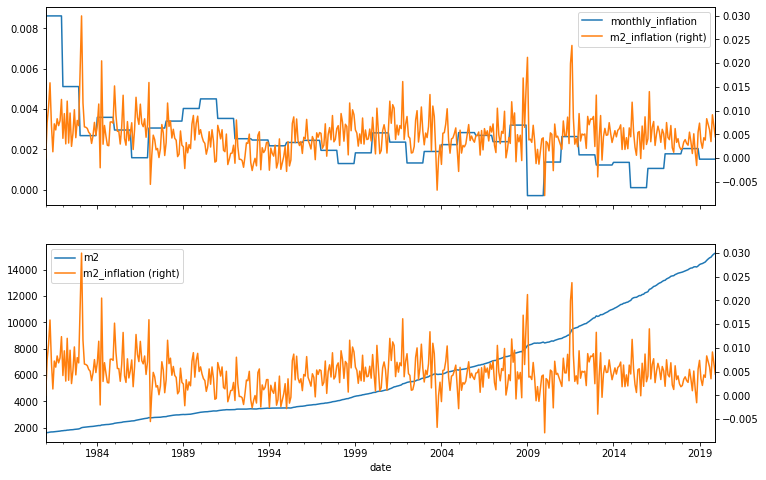

In [28]:
check = result01[1]

fig, ax = plt.subplots(2, figsize=(12, 8))
df.plot(y="monthly_inflation", ax=ax[0])
df.plot(y="m2_inflation", ax=ax[0], secondary_y=True)
df.plot(y="m2", ax=ax[1])
df.plot(y="m2_inflation", ax=ax[1], secondary_y=True)

In [159]:
check = result01[2]

idx = pd.IndexSlice
check.loc(axis=0)[slice(None), 0]

,,abs_pi,var_pi,abs_pp_i,abs_pp_m,var_pp_i,var_pp_m,delta
1981-01-01,0.0,0,0,0,0,0,0,0
1981-02-01,0.0,0,0,0,0,0,0,0
1981-03-01,0.0,0,0,0,0,0,0,0
1981-04-01,0.0,0,0,0,0,0,0,0
1981-05-01,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2019-08-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


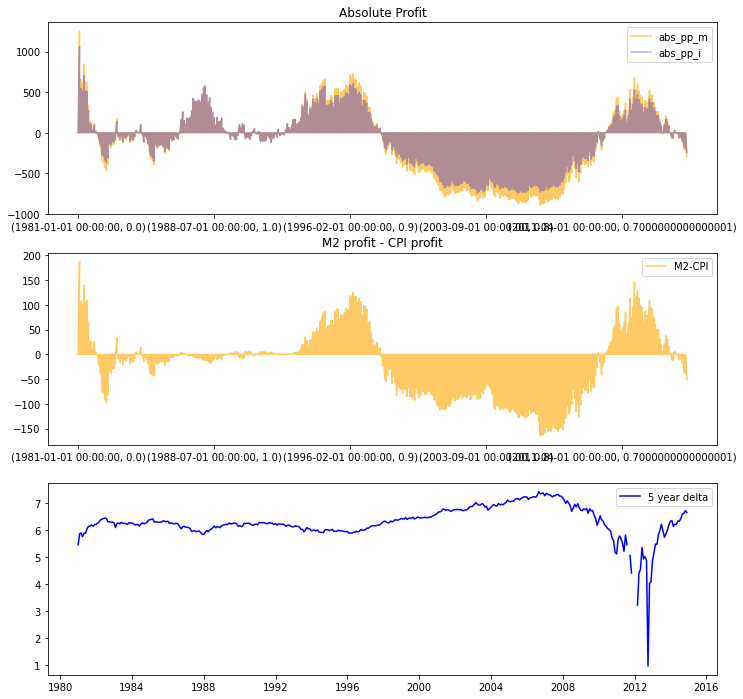

In [170]:
# --- Profit Plots

yr = 5
shift_gold_by = 12 * yr
shifted_glm = glm.copy().shift(periods=shift_gold_by, freq='infer')
gold_delta = glm.gold.add(-shifted_glm.gold)
gold_delta = gold_delta.iloc[shift_gold_by:]

year = result01[yr]#.loc(axis=0)[slice(None), 1]

year_ratio = result01[yr].loc(axis=0)[slice(None), 0.5]

fig, ax = plt.subplots(nrows=3, figsize=(12,12))

year.plot(y="abs_pp_m", 
              ax=ax[0], 
              color="orange", 
              alpha=0.6, 
              title="Absolute Profit"
             )
year.plot(y='abs_pp_i', 
              ax=ax[0], 
              color='blue', 
              alpha = 0.3, 
              title="Absolute Profit",
             )
# year_ratio.plot(y="abs_pp_m",
#                 ax=ax[0],
#                 color='orange',
#                 title="Abs pp, ratio=0.5"
#                )
year['delta'] = year.abs_pp_m - year.abs_pp_i
year.plot(y="delta", 
              ax=ax[1], 
              color="orange", 
              alpha=0.6, 
              title="M2 profit - CPI profit",
              label="M2-CPI"
             )
# ax[2].plot(glm.index, np.log(glm.gold), color="orange", label="Gold price")
ax[2].plot(glm.index, np.log(gold_delta + 500), color="blue", label='{} year delta'.format(yr))
ax[2].legend()


<AxesSubplot:xlabel='var_pp_m', ylabel='abs_pp_m'>

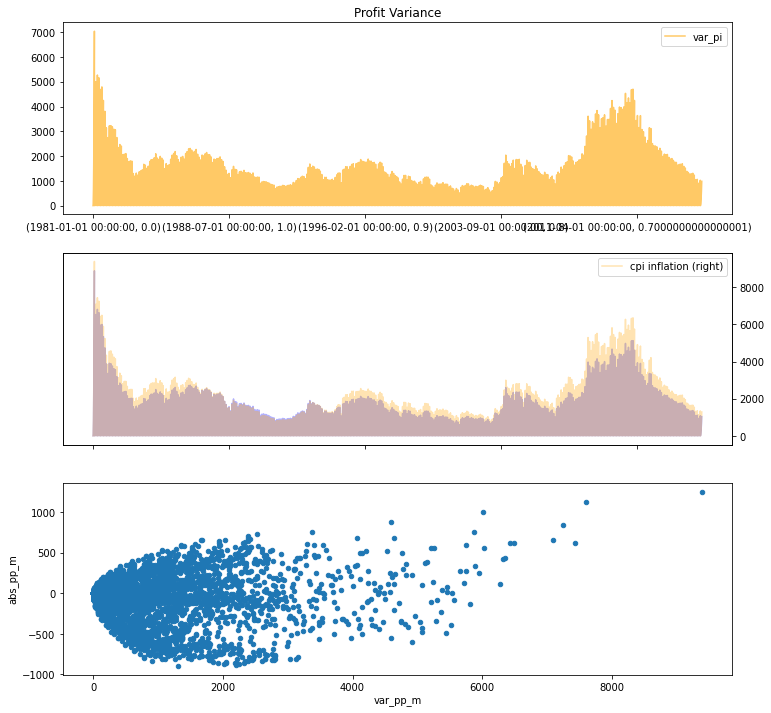

In [196]:
# --- Plot var_pi

fig, ax = plt.subplots(nrows=3, figsize=(12,12))
yr10 = result01[yr].copy()
yr10['ratio'] = [i[1] for i in yr10.index]

yr10.plot(y="var_pi", ax=ax[0], color="orange", alpha=0.6, title="Profit Variance")

yr10['d_pp_inflation'] = yr10.var_pp_m - yr10.var_pp_i
yr10.plot(y="var_pp_i", ax=ax[1], color='blue', alpha=0.3, label="cpi inflation", secondary_y=True)
yr10.plot(y="var_pp_m", ax=ax[1], color='orange', alpha=0.3, label="M2 inflation", secondary_y=True)
# yr10.plot(y='d_pp_inflation', ax=ax[2], color='orange')
yr10.plot(y='abs_pp_m', x='var_pp_m', ax=ax[2], kind='scatter')
# ax[2].plot(, color="orange", label="Gold price")
# ax[1].plot(glm.index, gold_delta + 600, color="blue", label='1 year gold delta')
# ax[1].legend()

<AxesSubplot:xlabel='var_pp_m', ylabel='abs_pp_m'>

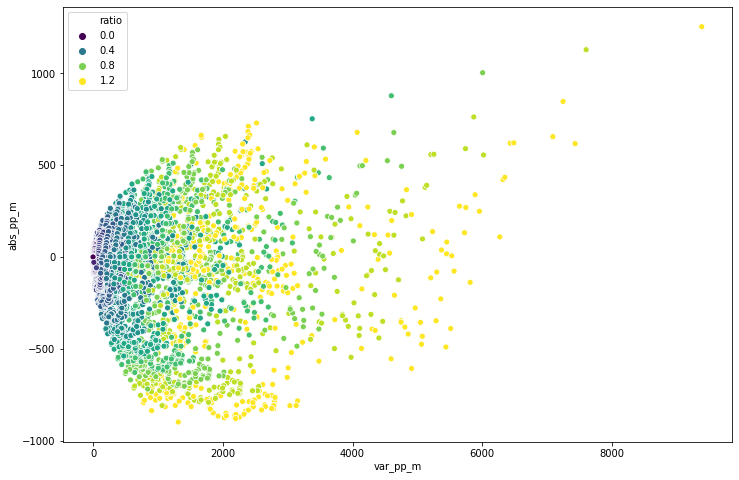

In [207]:
# import seaborn as sns

fig, ax = plt.subplots(1, figsize=(12, 8))
sns.scatterplot(x='var_pp_m', y='abs_pp_m', hue='ratio', data=yr10, ax=ax, palette="viridis")

___
# Simulation 0 Analysis
___

Considering that the default action with this portfolio is hodl and do nothing, and that it's a simple matter of expected return and risk, I imagine that the vibe of this portfolio would resonate strongly with the personality of that little robot in us who busily balances expected risk and return in the manner outlined by [MPT](https://en.wikipedia.org/wiki/Modern_portfolio_theory#Mathematical_model). Makes sense to look at this two-asset portfolio from that perspective, so let's lobotomize, put our rational hats on remaining brain, and write a bunch of sigmas.

___
# Bibliography
___

Harry M. Markowitz 1968. . Portfolio Selection: Efficient Diversification of Investments . Yale University Press.

